<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/4_Clasificacion/Clasificacion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

#<font color='#97171e'>AIT - Master in Data Science</font> 📈
# **Module 8: Class 6 - Introduction to classification and Logistic Regression**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc("font", size=14)

## Limitaciones de la Regresión Lineal

In [2]:
lst1 = [*range(10, 30)]
lst2 = [0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1]

In [3]:
print(lst1)
print(lst2)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [4]:
df = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['edad', 'compra'])
df.head()

,edad,compra
0,10,0
1,11,0
2,12,0
3,13,0
4,14,0


<Axes: xlabel='edad', ylabel='compra'>

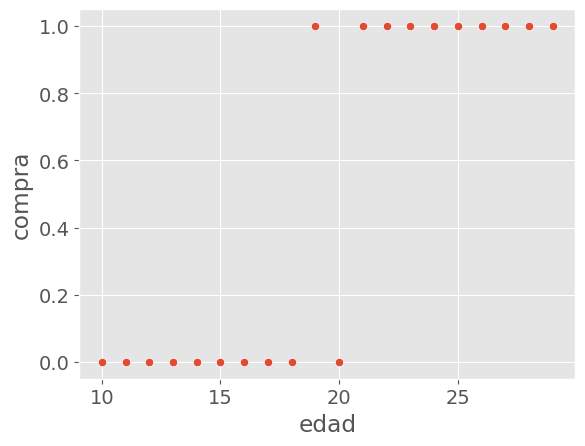

In [5]:
sns.scatterplot(data=df, x="edad", y="compra")

In [6]:
X = df['edad'].values.reshape(-1, 1)
y = df['compra'].values.reshape(-1, 1)

reg = linear_model.LinearRegression()
reg = reg.fit(X, y)

In [7]:
df['compra_pred'] = reg.predict(X)
df.head()

,edad,compra,compra_pred
0,10,0,-0.200000
1,11,0,-0.126316
2,12,0,-0.052632
3,13,0,0.021053
4,14,0,0.094737


<Axes: xlabel='edad', ylabel='compra'>

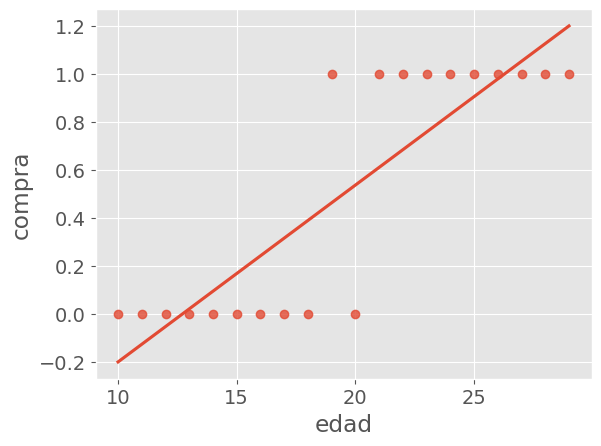

In [8]:
sns.regplot(data=df, x="edad", y="compra", ci=None)

<Axes: xlabel='edad', ylabel='compra'>

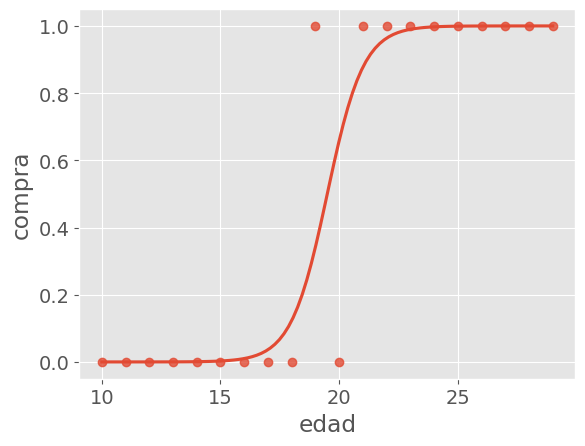

In [9]:
sns.regplot(data=df, x="edad", y="compra", logistic=True, ci=None)

## Regresión Logística

In [10]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [11]:
titanic = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/titanic_clase4.csv')

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preparación del dataset
Vamos a conservar solo algunas de las variables:

In [14]:
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

df = titanic[columns]
df.dropna(inplace = True) # eliminamos los registros con faltantes

C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_23212\3006061290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True) # eliminamos los registros con faltantes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


Vamos a usar la libreria **[Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling)** para realizar un breve análisis exploratorio del dataset.
Check whether the updated version runs in your environment. I have provided some installation commands. Choose the one you want to use.

In [16]:
# !pip install -U pandas-profiling
# !pip install ydata-profiling

In [17]:
# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport


c:\Users\Luciano Gabbanelli\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\Luciano Gabbanelli\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [18]:
# Generate the Profiling Report
profile = ProfileReport(df)

In [19]:
# Or use the HTML report in an iframe
profile
# Si no ves el output interactivo abajo de esta celda, volver a ejecutar en Colab

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Borramos outliers

In [20]:
def check_outliers(df, cols, store=False):
    """
    La función toma un dataframe, una lista de columnas y un booleano store.
    Si store=False, solo imprime la cantidad de outliers que hay en cada columna de la lista.
    Si store=True, devuelve un diccionario que tiene como claves los nombres de las
    columnas y como valores los indices de los outliers de cada una de ellas.

    Parameters
    ----------
    df: Dataframe
    cols: list
    store: bool

    Returns
    -------
    Si store=True:
        dict_outliers: dict
    """
    dict_outliers=dict()
    for cat in cols:
        df_cat = df[cat]
        Q1 = df_cat.quantile(0.25) # 1er cuartil
        Q3 = df_cat.quantile(0.75)# 3er cuartil
        IQR = Q3-Q1 # interquartile range
        outlier_step = IQR * 1.5
        outliers = df_cat[~((df_cat >= Q1 - outlier_step) & (df_cat <= Q3 + outlier_step))].index.tolist()
        dict_outliers[cat]=outliers
        if not store:
            print('Para la variable {} hay {} outliers'.format(cat, len(outliers)))
    if store:
        return dict_outliers

In [21]:
def remove_outliers(df, cols):
    """
    La función toma un dataframe y una lista de columnas.
    Droppea los outliers del dataframe en esas columnas.

    Parameters
    ----------
    df: Dataframe
    cols: list
    """
    outliers = check_outliers(df, cols, store=True)
    for cat in cols:
        df.drop(outliers[cat], inplace = True, errors = 'ignore')

In [22]:
cats = ['Sex', 'Pclass', 'Embarked']
nums = list(set(df.columns) - set(cats))
check_outliers(df, nums)

Para la variable Fare hay 95 outliers
Para la variable SibSp hay 35 outliers
Para la variable Survived hay 0 outliers
Para la variable Age hay 8 outliers


In [23]:
remove_outliers(df, nums)

C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_23212\3530471894.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers[cat], inplace = True, errors = 'ignore')
C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_23212\3530471894.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers[cat], inplace = True, errors = 'ignore')
C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_23212\3530471894.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

## Preprocessing

Antes de usar scaler o crear las variables dummies debemos splittear en train y test, para evitar luego el leak de information.

In [24]:
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
# Partición en train y test
y = df.loc[:, df.columns == 'Survived']
X = df.loc[:, df.columns != 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [27]:
encoder = OneHotEncoder(drop="first")  # aprendo las dummies de train
cats_train = encoder.fit_transform(X_train[cats]).toarray()

print(encoder.get_feature_names_out())  # por las dudas chequeamos
cats_test = encoder.transform(X_test[cats]).toarray()  # no fit, ya aprendi el parámetro

['Sex_male' 'Pclass_2' 'Pclass_3' 'Embarked_Q' 'Embarked_S']


In [28]:
nums = list(set(X_train.columns) - set(cats)) # obtenemos solo las columnas con variables numéricas
scaler = StandardScaler() # setteamos el scaler

# estandarizamos
nums_train = scaler.fit_transform(X_train[nums]) # estandarizamos train
nums_test = scaler.fit_transform(X_test[nums]) # estandarizamos test

# creamos los train y test set finales con todas las columnas categóricas y numéricas
X_train_final = np.concatenate([nums_train, cats_train], axis=1)
X_test_final = np.concatenate([nums_test, cats_test], axis=1)

## Modelo

Vamos a usar LogisticRegression de Scikit-learn


In [29]:
# instancia del modelo
logisticRegr = LogisticRegression(max_iter=10000)

In [30]:
# entrenamiento
logisticRegr.fit(X_train_final, y_train)
#logisticRegr.fit(x_train, y_train, solver='liblinear')

c:\Users\Luciano Gabbanelli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [31]:
# performance
y_pred = logisticRegr.predict(X_test_final)
print('El accuracy de nuestra regresión logística en el set de test es: {:.2f}'.format(logisticRegr.score(X_test_final, y_test)))

El accuracy de nuestra regresión logística en el set de test es: 0.85


You can measure the accuracy on the training set to check for overfitting. 

Additionally, you can employ different solvers for your Logistic Regression algorithm. 

Don't forget to review the documentation and familiarize yourself with the various hyperparameters :)

In [32]:
logisticRegr = LogisticRegression(max_iter=10000, solver='liblinear')

logisticRegr.fit(X_train_final, y_train)

# performance
y_pred = logisticRegr.predict(X_test_final)
print('El accuracy de nuestra regresión logística en el set de test es: {:.2f}'.format(logisticRegr.score(X_test_final, y_test)))

El accuracy de nuestra regresión logística en el set de test es: 0.85


c:\Users\Luciano Gabbanelli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Métricas de evaluación



**Matriz de confusión**

Observación: la matriz de confsión de sklearn está espejada respecto a lo visto en la teoría:

                                tn fp
                                fn tp

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[67  5]
 [12 32]]


In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

[[67  5]
 [12 32]]


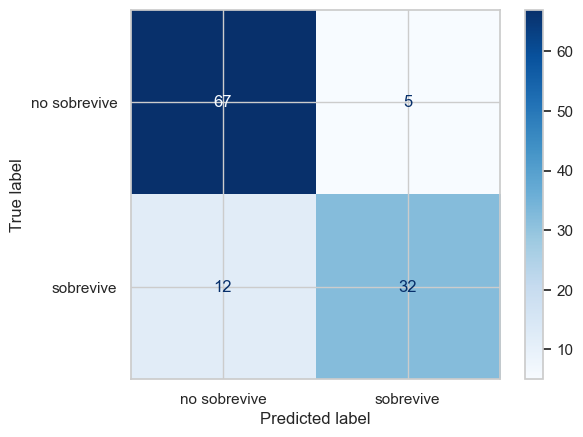

In [52]:
class_names = ['no sobrevive', 'sobrevive']

cm_display = ConfusionMatrixDisplay.from_estimator(logisticRegr, X_test_final, y_test, 
                                                    display_labels=class_names, 
                                                    cmap=plt.cm.Blues)

print(cm_display.confusion_matrix)

**Precision, Recall y F-Score**

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [54]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.853448
Precision: 0.864865
Recall: 0.727273
F1 score: 0.790123


Si bien el `accuracy` y la `precision` presentan buenos resultados, el `recall` y el `f1_score` no son tan destacables. Esto indica que nuestro modelo aún tiene margen de mejora.

Por ejemplo, en el ámbito de la medicina, el `recall` es una métrica crucial. . A veces es más importante asegurar una alta exhaustividad (``recall``) que una alta exactitud (`precision`). Es preocupante que esta métrica no muestre un buen rendimiento en contextos donde no podemos permitirnos pasar por alto casos positivos.

**ROC**

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [56]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test_final)[:,1])

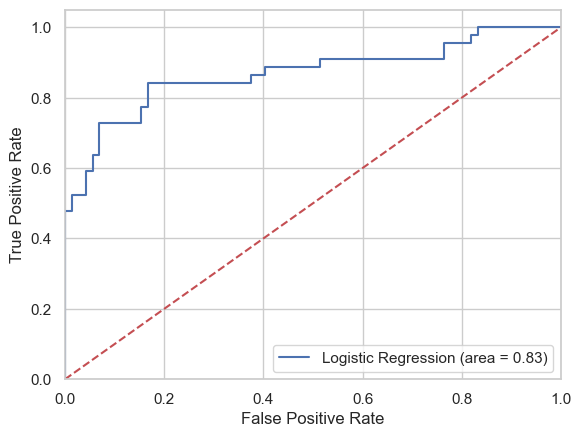

In [57]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--') # We add the random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()